### Polynomial Regression (다항 회귀)
- feature를 PolynomialFeature 클래스를 이용해 차수(degree)를 정하고 다항식 feature로 변환한다.
- 다음, 선형 회귀 클래스인 LinearRegression()을 이용해 학습-예측을 수행한다.

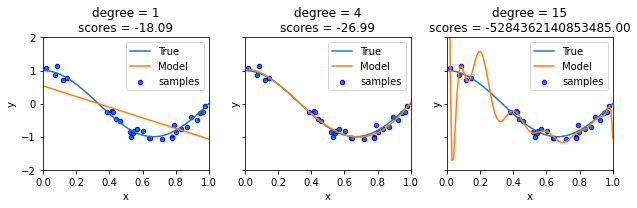

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Regression을 위한 라이브러리 로드
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# 실험 데이터 생성
def true_func(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X_trn = np.sort(np.random.rand(n_samples))
y_trn = true_func(X_trn) + np.random.randn(n_samples) * 0.1
X_test = np.linspace(0, 1, 100)

# Polynomial 모델의 degree
degrees = [1, 4, 15]

# Polynomial Regression 학습 후 모델의 예측값과 교차 검증 점수의 평균을 반환
def gen_prediction(X_trn, X_test, y_trn, degree):

    pipeline = Pipeline([
        ('poly',PolynomialFeatures(degree = degree)),
        ('linear_reg', LinearRegression())
    ])
    
    pipeline.fit(X_trn.reshape(-1, 1), y_trn)

    y_pred = pipeline.predict(X_test.reshape(-1, 1))
    scores = cross_val_score(pipeline, X_trn.reshape(-1, 1), y_trn) 
                     
    return y_pred, scores.mean()

# 결과 시각화
fig, axs = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
for i, (d, ax) in enumerate(zip(degrees, axs)):
    ax.plot(X_test, true_func(X_test), label="True")
    ax.scatter(X_trn, y_trn, ec="b", s=20, label="samples")
    y_pred, scores = gen_prediction(X_trn, X_test, y_trn, d)
    ax.plot(X_test, y_pred, label="Model")  
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"degree = {d}\nscores = {scores:0.2f}")
    ax.set_xlim(0, 1)
    ax.set_ylim(-2, 2)
    ax.legend()

fig.tight_layout()